*Importing Libraries*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re  # (regular expression - a library useful for searching word in a paragraph)
from nltk.corpus import (
    stopwords,
)

# stopword- words that doesn't add much value of the paragraph , like -'the' ,'with' ,'i',etc.
from nltk.stem.porter import (
    PorterStemmer,
)

# returns the root of a word by removing its prefix and suffix
from sklearn.feature_extraction.text import (
    TfidfVectorizer,
)

# to convert text into feature vector (i.e numbers)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import pickle
import time
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud

*Importing Natural Language Toolkit*
To remove stopword- words that doesn't add much value of the paragraph , like -'the' ,'with' ,'i',etc.

In [2]:
import nltk

nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

*Importing Dataset*
The dataset used here is taken from kaggle

In [4]:
news = pd.read_csv("NewsDetection data2.csv")
news.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,0
1,NaN,Did they post their votes for Hillary already?,0
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",0
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,1
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",0


*Data Preprocessing*

Data preprocessing is an essential step in preparing and transforming raw data into a format suitable for analysis and machine learning algorithms. It involves several techniques to clean, normalize, transform, and enhance the data.

*Taking Care of missing data and null values*
It is an important step in data preprocessing and analysis.

In [5]:
news["text"] = news["text"].fillna("")

In [6]:
news["title"] = news["title"].fillna("")

In [7]:
news["titletext"] = news.title + " " + news.text
# news.drop(["title", "text"], axis=1, inplace=True)
news.head()

,title,text,label,titletext
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,,Did they post their votes for Hillary already?,0,Did they post their votes for Hillary already?
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",0,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,1,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",0,SATAN 2: Russia unvelis an image of its terrif...


In [8]:
news.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
71829    0
71830    0
71831    0
71832    0
71833    0
Length: 71834, dtype: int64

In [9]:
news.isnull().sum(axis=0)

title        0
text         0
label        0
titletext    0
dtype: int64

*Data Visualization*

Data visualization is the process of representing data visually using charts, graphs, plots, and other visual elements. It helps in understanding patterns, trends, and relationships within the data, making it easier to communicate insights and make data-driven decisions. 

*Bar Graph Visualization of count of fake and real news using Seaborn*

Bar charts are used to compare categories or groups by displaying rectangular bars of different lengths or heights.


<Axes: xlabel='label', ylabel='count'>

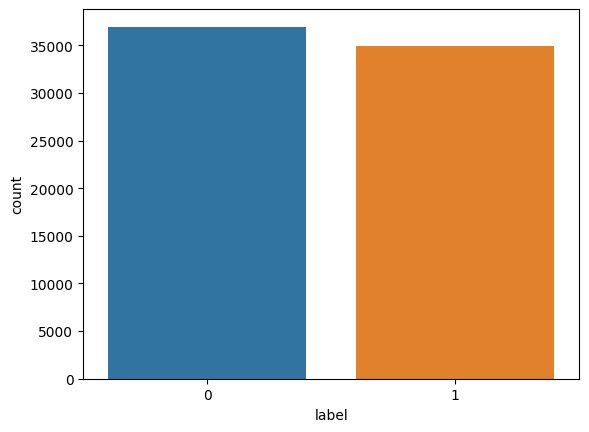

In [10]:
sns.countplot(data=news, x="label", order=news["label"].value_counts().index)

*Keywords Visualization using Wordcloud*

Word clouds visually represent the frequency or importance of words in a textual dataset, with more frequent or important words displayed in larger text size.

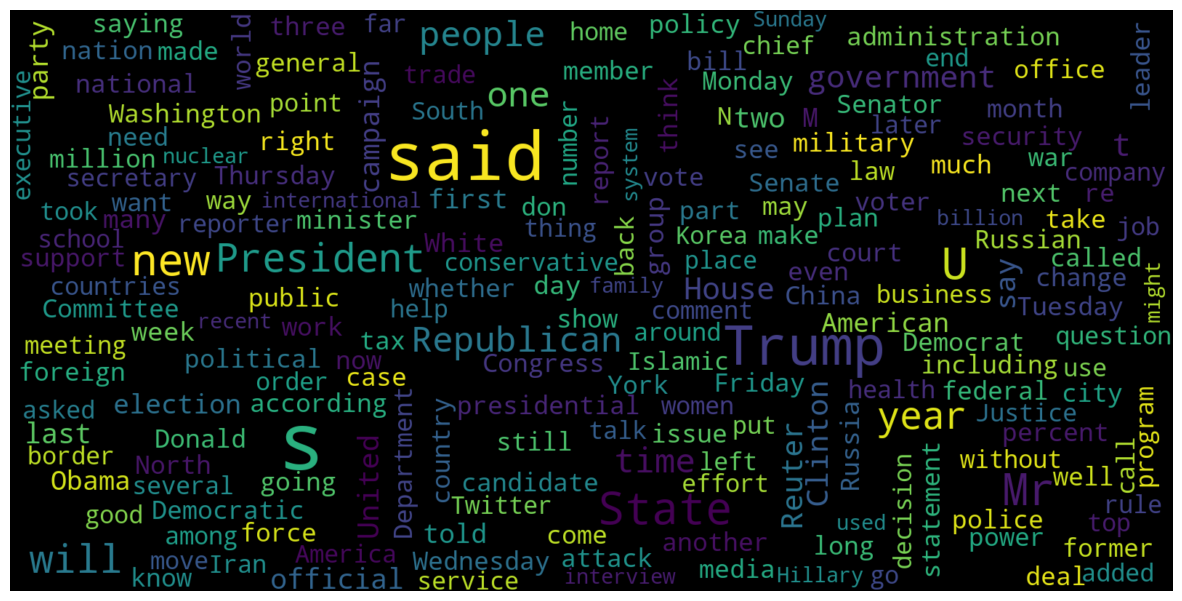

In [11]:
# Real
consolidated = " ".join(
    word for word in news["titletext"][news["label"] == 1].astype(str)
)
wordCloud = WordCloud(
    width=1600, height=800, random_state=21, max_font_size=110, collocations=False
)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation="bilinear")
plt.axis("off")
plt.show()

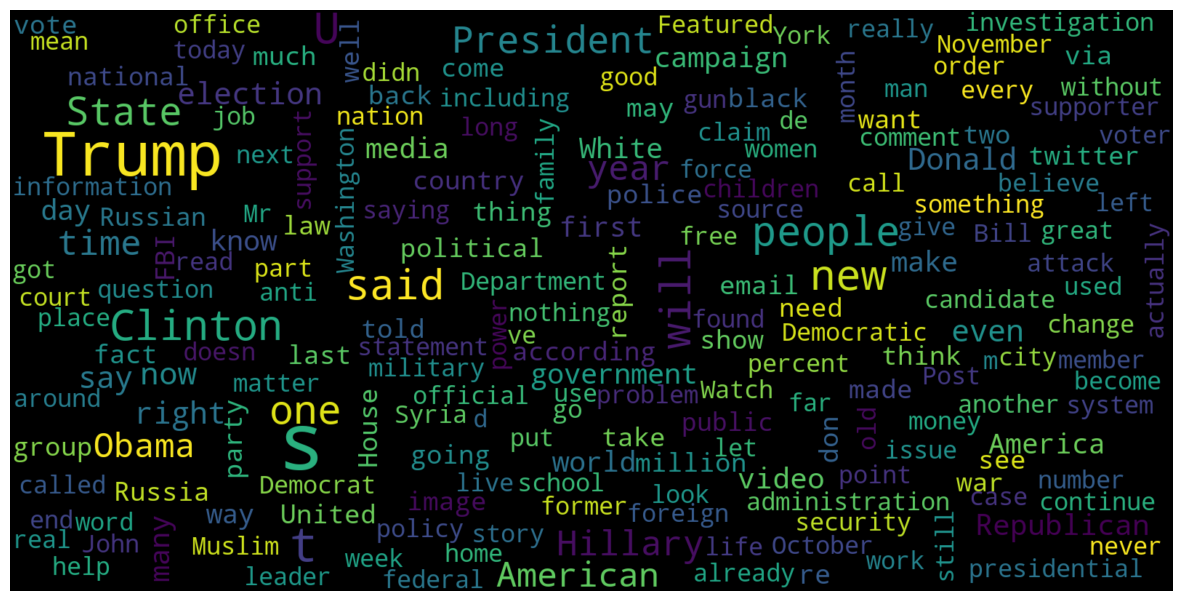

In [12]:
# Fake
consolidated = " ".join(
    word for word in news["titletext"][news["label"] == 0].astype(str)
)
wordCloud = WordCloud(
    width=1600, height=800, random_state=21, max_font_size=110, collocations=False
)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
X = news.drop("label", axis=1)
y = news["label"]

*Function to Clean the text*

Stopwords are commonly used words that are often removed from text data during natural language processing tasks. These words are considered to have little or no significant meaning and are often used to improve the efficiency and accuracy of text analysis, search engines, and information retrieval systems.

The Porter stemmer is a widely used stemming algorithm developed by Martin Porter in 1980. Stemming is the process of reducing words to their base or root form, which can help in reducing variant forms of words to a common representation.


In [14]:
import re
import string

stopwords = nltk.corpus.stopwords.words("english")
stemmer = nltk.PorterStemmer()


def count_punct(text):
    non_space_count = len(text) - text.count(" ")
    if non_space_count == 0:
        return 0  # or any other appropriate value
    else:
        count = sum([1 for char in text if char in string.punctuation])
        return round(count / non_space_count, 3) * 100


news["body_len"] = news["titletext"].apply(lambda x: len(x) - x.count(" "))
news["punct%"] = news["titletext"].apply(lambda x: count_punct(x))


def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split("\W+", text)
    text = [stemmer.stem(word) for word in tokens if word not in stopwords]
    return text

*Spliting the Dataset into training and Testing sets*

Splitting a dataset refers to the process of dividing a given dataset into multiple subsets or partitions for different purposes. This is a common practice in data analysis, machine learning, and statistical modeling tasks. By splitting the dataset, we can allocate data for various uses such as model training, model validation, and model evaluation.

The main purpose of splitting a dataset is to ensure that the model or analysis is tested on unseen data, which helps in assessing its generalization and performance on new observations.

Here, 80% of the dataset is used to train the model while 20% is used to test the model.

In [15]:
from sklearn.model_selection import train_test_split

X = news[["titletext", "body_len", "punct%"]]
y = news["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

*TF-IDF Vectorizer* 

TF-IDF (Term Frequency-Inverse Document Frequency) is a commonly used weighting scheme in natural language processing and information retrieval. TF-IDF Vectorizer is a feature extraction method that transforms text documents into numerical representations using the TF-IDF approach. It assigns a weight to each term (word) in the document based on its frequency within the document and its inverse frequency across all documents in the corpus.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vect = TfidfVectorizer(analyzer=clean_text, max_features=1000)
tfidf_vect_fit = tfidf_vect.fit(X_train["titletext"])

tfidf_train = tfidf_vect_fit.transform(X_train["titletext"])
tfidf_test = tfidf_vect_fit.transform(X_test["titletext"])

X_train = pd.concat(
    [
        X_train[["body_len", "punct%"]].reset_index(drop=True),
        pd.DataFrame(tfidf_train.toarray()),
    ],
    axis=1,
)
X_test = pd.concat(
    [
        X_test[["body_len", "punct%"]].reset_index(drop=True),
        pd.DataFrame(tfidf_test.toarray()),
    ],
    axis=1,
)
X_train.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,990,991,992,993,994,995,996,997,998,999
0,534,1.7,0.053729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1319,2.2,0.040201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.050153,0.000000,0.000000,0.000000
2,394,2.8,0.073845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,9967,2.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.046951,0.0,0.015467,0.10485,0.0,0.092809,0.051609,0.027969,0.048708,0.066869
4,2882,2.9,0.021313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.023906,0.00000,0.0,0.000000,0.026589,0.043230,0.000000,0.000000


In [17]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

*Function to plot Confusion matrix for a trained classifier model*

Confusion matrix is a popular performance evaluation tool used in machine learning and classification tasks. It provides a summary of the predictions made by a classification model on a test dataset. The matrix helps in understanding the model's performance by showing the number of true positives, true negatives, false positives, and false negatives.

A confusion matrix is typically organized in a tabular format with two dimensions: actual classes (or ground truth) and predicted classes. It consists of four essential elements:

True Positives (TP): The number of instances that are correctly predicted as positive (class label) by the model.

True Negatives (TN): The number of instances that are correctly predicted as negative (class label) by the model.

False Positives (FP): The number of instances that are incorrectly predicted as positive (class label) by the model.

False Negatives (FN): The number of instances that are incorrectly predicted as negative (class label) by the model.

In [18]:
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import itertools


def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")

*Data Modeling*

*1.Logistic Regression*

Accuracy: 93.51%
Confusion matrix, without normalization
MSE: 0.0649404886197536
R2: 0.7401284808513287
Recall:  0.9292211483797612
Precision:  0.9376165208661982
F1-Score:  0.9333999571703905


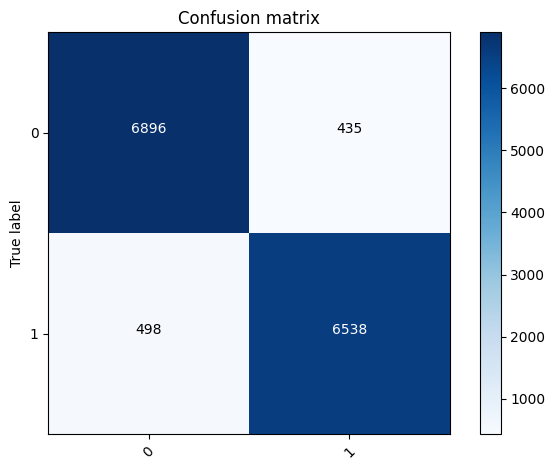

In [19]:
# Taining the model
clf1 = LogisticRegression(solver="liblinear", max_iter=1000)
clf1.fit(X_train, y_train)
# Predicting the value using trained model
pred_1 = clf1.predict(X_test)

# Checking Accuracy
score = accuracy_score(y_test, pred_1)
print(f"Accuracy: {round(score*100,2)}%")

# Confusion Matrix
cm = confusion_matrix(y_test, pred_1, labels=[0, 1])


cm_rf = confusion_matrix(y_test, pred_1)
plot_confusion_matrix(cm_rf, classes=[0, 1])


# Mean Square Error
mse_rf = mean_squared_error(y_test, pred_1)
print("MSE: " + str(mse_rf))

# R2-Score
r2score_1 = r2_score(y_test, pred_1)
print("R2: " + str(r2score_1))

# Performance Evaluation:

recall = cm[1][1] / (cm[1][1] + cm[1][0])
print("Recall: ", recall)

precision = cm[1][1] / (cm[1][1] + cm[0][1])
print("Precision: ", precision)

F1_Score = 2 * ((precision * recall) / (precision + recall))
print("F1-Score: ", F1_Score)

*2. Multinomial Naive Bayes*

Multinomial Niave Bayyes Accuracy: 83.34%
Confusion matrix, without normalization
MSE: 0.1666318646899144
R2: 0.3331914074577502
Recall:  0.8362706083001705
Precision:  0.8257086724670222
F1-Score:  0.830956079649767


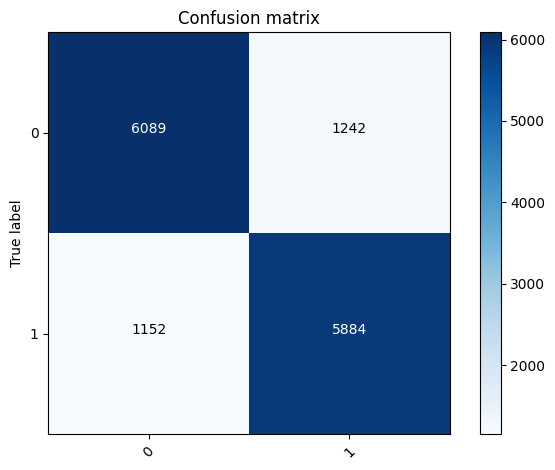

In [20]:
# Training the model
Clf2 = MultinomialNB()
Clf2.fit(X_train, y_train)
# Predicting the value using the trained model
pred_2 = Clf2.predict(X_test)

# Checking Accuracy
score1 = accuracy_score(y_test, pred_2)
print(f"Multinomial Niave Bayyes Accuracy: {round(score1*100,2)}%")

# Confusion matrix
cm = confusion_matrix(y_test, pred_2, labels=[0, 1])

cm_rf = confusion_matrix(y_test, pred_2)
plot_confusion_matrix(cm_rf, classes=[0, 1])

# Mean Square Error
mse_rf = mean_squared_error(y_test, pred_2)
print("MSE: " + str(mse_rf))

# R2-Score
r2score_1 = r2_score(y_test, pred_2)
print("R2: " + str(r2score_1))

# Performance Evaluation:

recall = cm[1][1] / (cm[1][1] + cm[1][0])
print("Recall: ", recall)

precision = cm[1][1] / (cm[1][1] + cm[0][1])
print("Precision: ", precision)

F1_Score = 2 * ((precision * recall) / (precision + recall))
print("F1-Score: ", F1_Score)

*3. Support Vector Classifier*

In [21]:
# Training the model
Clf3 = SVC(kernel="linear", C=0.1)
Clf3.fit(X_train, y_train)
# Predicting the values using trained model
pred_3 = Clf3.predict(X_test)

# Checking the accuracy of the model
score2 = metrics.accuracy_score(y_test, pred_3)
print(f" SVM Accuracy: {round(score2*100,2)}%")

# confusion matrix
cm = confusion_matrix(y_test, pred_3, labels=[0, 1])
print(cm)

cm_rf = confusion_matrix(y_test, pred_3)
plot_confusion_matrix(cm_rf, classes=[0, 1])

# print(start - end)
mse_rf = mean_squared_error(y_test, pred_3)
print("MSE: " + str(mse_rf))

r2score_1 = r2_score(y_test, pred_3)
print("R2: " + str(r2score_1))

# Performance Evaluation

recall = cm[1][1] / (cm[1][1] + cm[1][0])
print("Recall: ", recall)

precision = cm[1][1] / (cm[1][1] + cm[0][1])
print("Precision: ", precision)

F1_Score = 2 * ((precision * recall) / (precision + recall))
print("F1-Score: ", F1_Score)

[[8627, 472], [693, 8018]]
SVM Accuracy: 93.46 %
Confusion matrix, without normalization
MSE: 0.06541268950028074
R2: 0.7382250013307236
Recall: 0.9204454138445644
Precision: 0.9444051825677268
F1-Score: 0.9322713795709551


*4. Decision Tree Classifier*

Decision Tree Accuracy: 90.07%
Confusion matrix, without normalization
MSE: 0.09932484165100577
R2: 0.6025330569934042
Recall:  0.8271745309835133
Precision:  0.9650140938484497
F1-Score:  0.8907936022040255


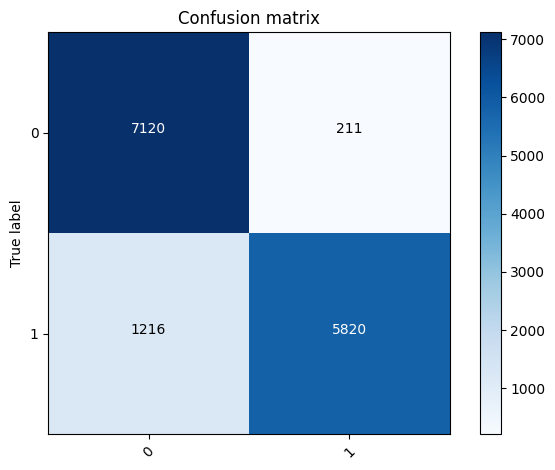

In [22]:
# Initialize and train the Decision Tree classifier
Clf4 = DecisionTreeClassifier(criterion="entropy", max_depth=5)
Clf4.fit(X_train, y_train)

# Make predictions using the trained classifiers
pred_4 = Clf4.predict(X_test)

# Evaluate the performance of the classifiers (e.g., using accuracy_score, confusion_matrix, etc.)
# ... (code to evaluate the performance of the classifiers)

score2 = metrics.accuracy_score(y_test, pred_4)
print(f"Decision Tree Accuracy: {round(score2*100,2)}%")


# Confusion Matrix
cm = confusion_matrix(y_test, pred_4, labels=[0, 1])

cm_rf = confusion_matrix(y_test, pred_4)
plot_confusion_matrix(cm_rf, classes=[0, 1])

# Mean Square Error
mse_rf = mean_squared_error(y_test, pred_4)
print("MSE: " + str(mse_rf))

# R2_Score
r2score_1 = r2_score(y_test, pred_4)
print("R2: " + str(r2score_1))
# Creating Pickle File
# filename = "finalized_model.pkl"
# pickle.dump(Ensemble, open(filename, "wb"))

# Performance Evaluation

recall = cm[1][1] / (cm[1][1] + cm[1][0])
print("Recall: ", recall)

precision = cm[1][1] / (cm[1][1] + cm[0][1])
print("Precision: ", precision)

F1_Score = 2 * ((precision * recall) / (precision + recall))
print("F1-Score: ", F1_Score)

*Ensemble Method*

*6. Ensemble Boosting Method - AdaBoost Classifier*

Accuracy: 95.28%
Confusion matrix, without normalization
MSE: 0.04719148047609104
R2: 0.8111544587536987
Recall:  0.9491188175099489
Precision:  0.9542726493283795
F1-Score:  0.9516887558785805


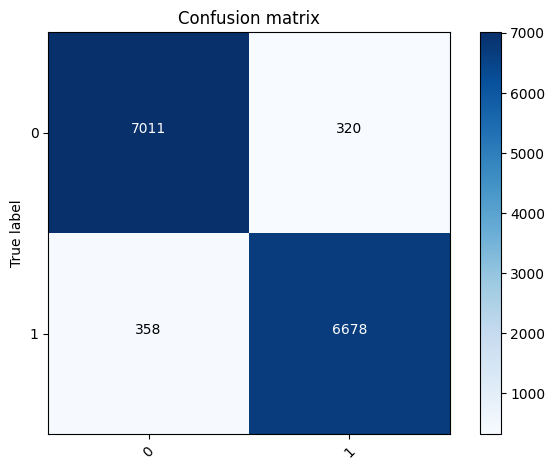

In [23]:
Clf6 = AdaBoostClassifier(n_estimators=1000, random_state=42)

Clf6.fit(X_train, y_train)
pred_6 = Clf6.predict(X_test)

score = accuracy_score(y_test, pred_6)
print(f"Accuracy: {round(score*100,2)}%")

# Confusion Matrix
cm = confusion_matrix(y_test, pred_6, labels=[0, 1])

cm_rf = confusion_matrix(y_test, pred_6)
plot_confusion_matrix(cm_rf, classes=[0, 1])

# Mean Squared Error
mse_rf = mean_squared_error(y_test, pred_6)
print("MSE: " + str(mse_rf))

# r2_score
r2score_1 = r2_score(y_test, pred_6)
print("R2: " + str(r2score_1))

# Performance Evaluation:

recall = cm[1][1] / (cm[1][1] + cm[1][0])
print("Recall: ", recall)

precision = cm[1][1] / (cm[1][1] + cm[0][1])
print("Precision: ", precision)

F1_Score = 2 * ((precision * recall) / (precision + recall))
print("F1-Score: ", F1_Score)

*7. Ensemble Boosting Method - XgbBoost Classifier*

Accuracy: 95.38%
Confusion matrix, without normalization
MSE: 0.04621702512702722
R2: 0.8150539242071622
Recall:  0.9259522455940875
Precision:  0.978522078702313
F1-Score:  0.9515116109244925


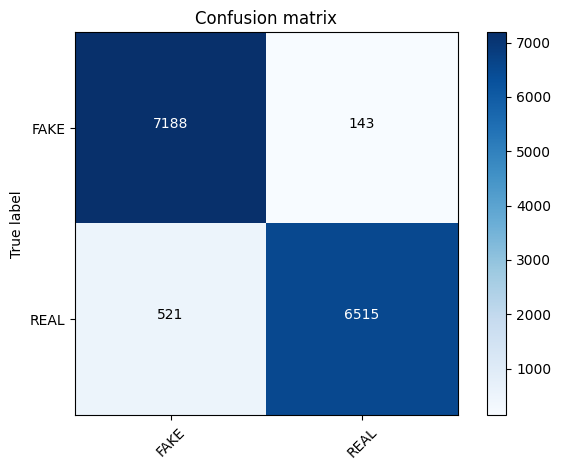

In [24]:
import xgboost as xgb
from xgboost import XGBClassifier

Clf7 = XGBClassifier(
    learning_rate=0.001,
    n_estimators=1000,
    max_depth=10,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    seed=42,
    gamma=0.01,
    reg_lambda=0.1,
)
Clf7.fit(X_train, y_train)
# make predictions for test data
pred_7 = Clf7.predict(X_test)
predictions = [round(value) for value in pred_7]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, pred_7, labels=[0, 1])

cm_xgb = confusion_matrix(y_test, pred_7)
plot_confusion_matrix(cm_xgb, classes=["FAKE", "REAL"])

# Mean_Square Error
mse_xgb = mean_squared_error(y_test, pred_7)
print("MSE: " + str(mse_xgb))

# R2-Score
r2score_xgb = r2_score(y_test, pred_7)
print("R2: " + str(r2score_xgb))

# Performace evaluation:

recall = cm[1][1] / (cm[1][1] + cm[1][0])
print("Recall: ", recall)

precision = cm[1][1] / (cm[1][1] + cm[0][1])
print("Precision: ", precision)

F1_Score = 2 * ((precision * recall) / (precision + recall))
print("F1-Score: ", F1_Score)

*8. Ensemble Boosting Method - Random Forest Classifier*

Random Forest Accuracy: 96.11%
Confusion matrix, without normalization
MSE: 0.038908610009048515
R2: 0.8442999151081381
Recall:  0.9407333712336555
Precision:  0.9789971897648276
F1-Score:  0.9594839457853157


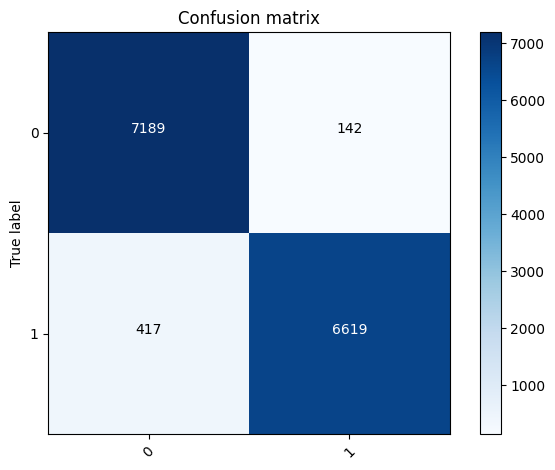

In [25]:
# Training the model
Clf8 = RandomForestClassifier(n_estimators=1000, random_state=42)
Clf8.fit(X_train, y_train)
# Predicting the value using the trained model
pred_8 = Clf8.predict(X_test)

# Checking the accuracy of the trained model
score2 = metrics.accuracy_score(y_test, pred_8)
print(f"Random Forest Accuracy: {round(score2*100,2)}%")

# confusion matrix
cm = confusion_matrix(y_test, pred_8, labels=[0, 1])

cm_rf = confusion_matrix(y_test, pred_8)
plot_confusion_matrix(cm_rf, classes=[0, 1])

# Mean Square Error
mse_rf = mean_squared_error(y_test, pred_8)
print("MSE: " + str(mse_rf))

# R2-Score
r2score_1 = r2_score(y_test, pred_8)
print("R2: " + str(r2score_1))

# Performace evaluation:

recall = cm[1][1] / (cm[1][1] + cm[1][0])
print("Recall: ", recall)

precision = cm[1][1] / (cm[1][1] + cm[0][1])
print("Precision: ", precision)

F1_Score = 2 * ((precision * recall) / (precision + recall))
print("F1-Score: ", F1_Score)

*Ensemble Voting Hard Method *

Ensemble Method Accuracy: 96.3%
Confusion matrix, without normalization
MSE: 0.03695969931092086
R2: 0.8520988460150649
Recall:  0.9430073905628198
Precision:  0.9807834441980784
F1-Score:  0.9615245272081734


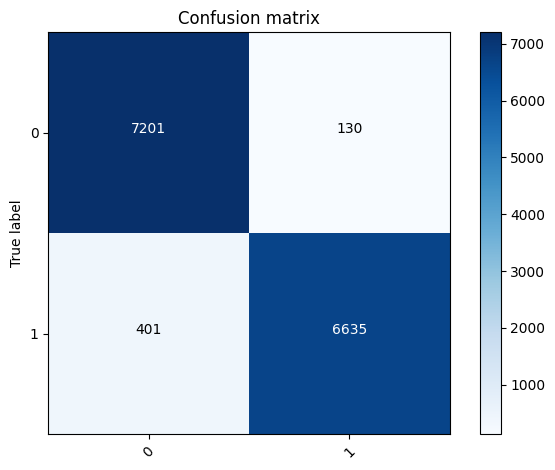

In [26]:
# Merging 3 models using voting ensemble method

final_model = VotingClassifier(
    estimators=[("Clf8", Clf8), ("Clf7", Clf7), ("Clf6 ", Clf6)],
    voting="hard",
    n_jobs=-1,
)
final_model.fit(X_train, y_train)
pred_fm = final_model.predict(X_test)


score2 = metrics.accuracy_score(y_test, pred_fm)
print(f"Ensemble Method Accuracy: {round(score2*100,2)}%")


# Confusion Matrix
cm = confusion_matrix(y_test, pred_fm, labels=[0, 1])

cm_rf = confusion_matrix(y_test, pred_fm)
plot_confusion_matrix(cm_rf, classes=[0, 1])

# Mean Square Error
mse_rf = mean_squared_error(y_test, pred_fm)
print("MSE: " + str(mse_rf))

# R2_Score
r2score_1 = r2_score(y_test, pred_fm)
print("R2: " + str(r2score_1))

# Performance Evaluation

recall = cm[1][1] / (cm[1][1] + cm[1][0])
print("Recall: ", recall)

precision = cm[1][1] / (cm[1][1] + cm[0][1])
print("Precision: ", precision)

F1_Score = 2 * ((precision * recall) / (precision + recall))
print("F1-Score: ", F1_Score)

In [27]:
# Creating Pickle File
file1 = "finalized_model1.pkl"
pickle.dump(final_model, open(file1, "wb"))

file2 = "vectorizer1.pkl"
pickle.dump(tfidf_vect, open(file2, "wb"))

*The ensemble method works well here with the accuracy of 96.11%*